# UT-ML-T14 - Journey to zero - Predict electricity consumption

Marko Raidlo

##Kaggle setup

In [152]:
# Kaggle setuo
from google.colab import files

files.upload(); # upload kaggle.json file

KeyboardInterrupt: ignored

In [355]:
import json

# Use kaggle.json file
!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
- path is now set to: {/content}


In [ ]:
# Download competition data
!kaggle competitions download -c 'predict-electricity-consumption' -w

In [ ]:
# Unzip competition data
!unzip predict-electricity-consumption.zip

In [ ]:
# Submit the sample_submission
!kaggle competitions submit -c predict-electricity-consumption -f sample_submission.csv -m "Sample submission"

##Data explorataion

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pickle

In [42]:
train =  pd.read_csv('train.csv')
train.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption
0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,NaN,NaN,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577
1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,NaN,NaN,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594
2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,NaN,NaN,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685
3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,NaN,NaN,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016
4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,NaN,NaN,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592 entries, 0 to 8591
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8592 non-null   object 
 1   temp         8592 non-null   float64
 2   dwpt         8592 non-null   float64
 3   rhum         8592 non-null   float64
 4   prcp         2159 non-null   float64
 5   snow         119 non-null    float64
 6   wdir         8592 non-null   float64
 7   wspd         8592 non-null   float64
 8   wpgt         8592 non-null   float64
 9   pres         8592 non-null   float64
 10  coco         8396 non-null   float64
 11  el_price     8592 non-null   float64
 12  consumption  8590 non-null   float64
dtypes: float64(12), object(1)
memory usage: 872.8+ KB


In [41]:
train.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption
count,8592.000000,8592.000000,8592.000000,2159.000000,119.000000,8592.000000,8592.000000,8592.000000,8592.000000,8396.000000,8592.000000,8590.000000
mean,6.744204,2.486767,77.013617,0.056647,78.319328,201.564246,9.156355,20.869681,1013.229423,4.902930,0.160844,1.046364
std,9.257806,8.184391,17.520566,0.384586,63.129130,87.792064,4.826976,9.956558,12.592944,4.958744,0.120034,1.095114
min,-26.100000,-28.700000,20.000000,0.000000,0.000000,0.000000,0.000000,2.900000,962.600000,1.000000,0.000070,0.000000
25%,0.400000,-2.900000,66.000000,0.000000,20.000000,150.000000,7.200000,13.000000,1006.500000,2.000000,0.092820,0.363000
50%,6.200000,1.900000,83.000000,0.000000,60.000000,210.000000,7.200000,18.500000,1014.700000,3.000000,0.136440,0.811000
75%,13.225000,9.000000,91.000000,0.000000,130.000000,270.000000,10.800000,27.800000,1020.700000,5.000000,0.199845,1.366000
max,31.400000,20.900000,100.000000,7.900000,220.000000,360.000000,31.700000,63.000000,1047.500000,25.000000,4.000000,10.381000


###12 variables:

time - definition of example_id

temp - Air Temperature (°C)

dwpt - The dew point in °C

rhum - The relative humidity in percent (%)

prcp - The one hour precipitation total in mm

snow - The snow depth in mm

wdir - The wind direction in degrees (°)

wspd - The average wind speed in km/h

wpgt - The peak wind gust in km/h

pres - The sea-level air pressure in hPa

coco - The weather condition code

el_price - the electricity price in Estonia on that hour (€/kWh)

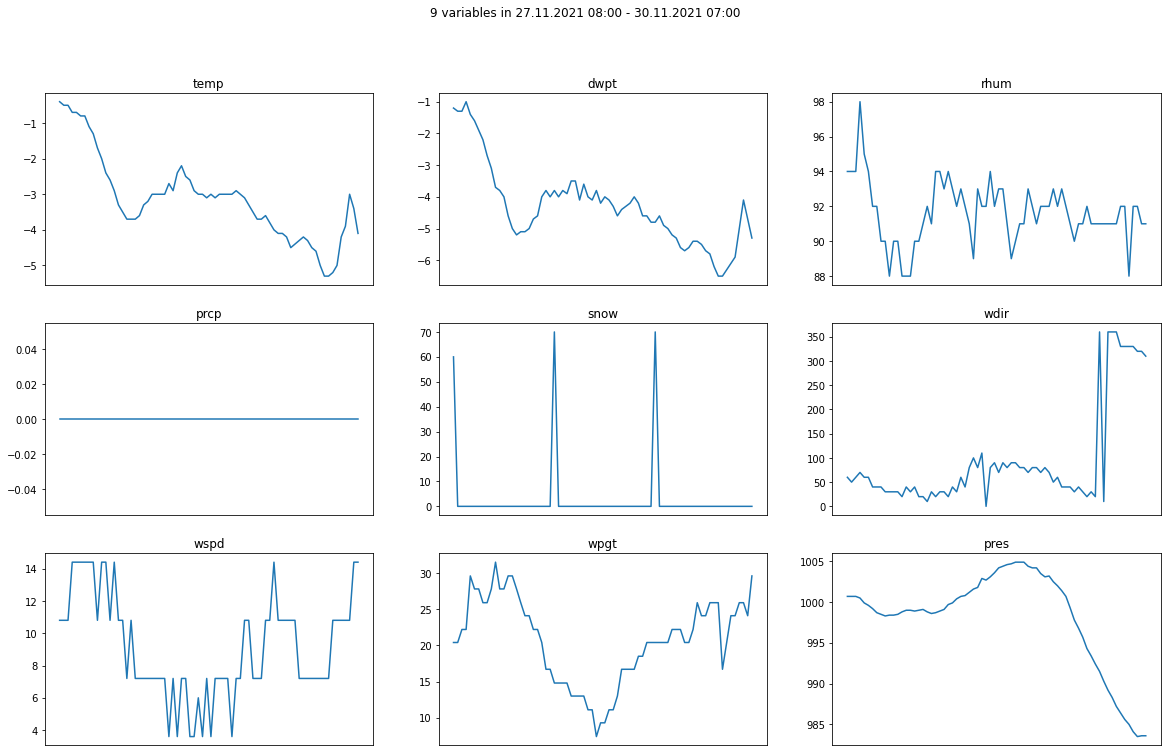

In [93]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle("9 variables in 27.11.2021 08:00 - 30.11.2021 07:00")

variables = ['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'el_price']
k = 0
time = 2097

for i in range(3):
  for j in range(3):
    axes[i, j].plot(train.time[time:time+72], train[variables[k]][time:time+72].fillna(0))
    axes[i, j].axes.get_xaxis().set_visible(False)
    axes[i, j].set_title(variables[k])

    k += 1

In [50]:
train.coco.value_counts()

1.0     1815
2.0     1716
4.0     1467
3.0     1120
14.0     767
7.0      623
5.0      232
17.0     179
18.0     113
21.0     104
8.0       94
12.0      48
15.0      38
10.0      18
9.0       17
25.0      15
19.0      13
22.0      10
13.0       2
6.0        2
16.0       1
20.0       1
23.0       1
Name: coco, dtype: int64

Weather codes (https://dev.meteostat.net/formats.html#weather-condition-codes)

1	Clear

2	Fair

4	Overcast

3	Cloudy

14 Light Snowfall

7	Light Rain

5	Fog

...

###Predict:  Consumption

consumption - the electricity consumption (kWh)

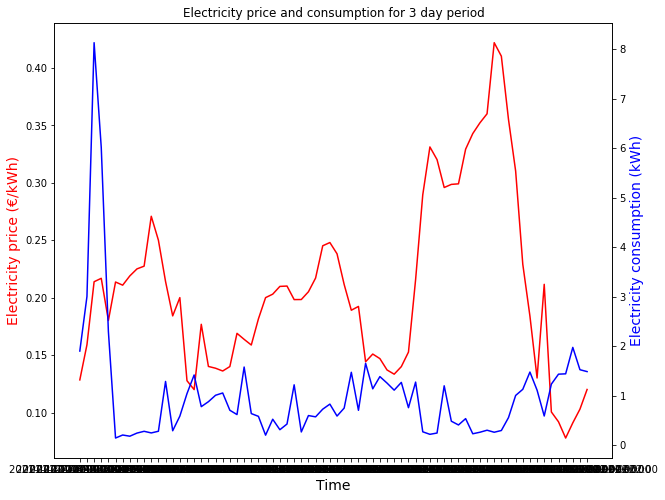

In [124]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Electricity price and consumption for 3 day period')
ax.plot(train.time[time:time+72], train.el_price[time:time+72], label='1', color='r')
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Electricity price (€/kWh)", color="red",fontsize=14)
# Fix time x-axis labels

ax2=ax.twinx()
ax2.plot(train.time[time:time+72], train.consumption[time:time+72], label='2', color='b')
ax2.set_ylabel("Electricity consumption (kWh)",color="blue",fontsize=14)


plt.show()

###Correletions between features

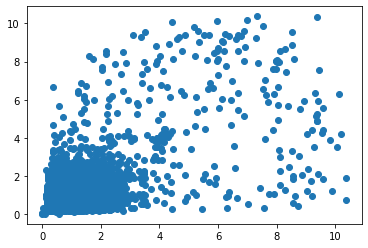

In [125]:
# x-axis consumption, y-axis consumption +1 hour
plt.scatter(train.consumption, train.consumption.shift(1, fill_value=0))

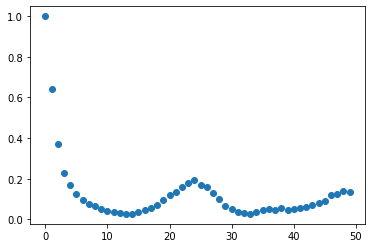

In [126]:
# Autocorrelation between consumption
# Note high correlation for previous few hours, plus 24 hours.
autokor = pd.DataFrame([train.consumption.autocorr(n) for n in range(50)])
plt.scatter(range(50), autokor)

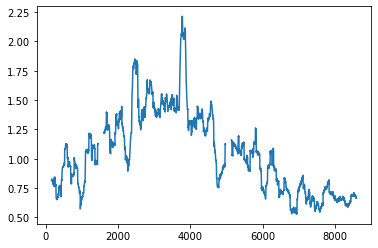

In [132]:
# Avarages over a week
# Winter has higher consumption
train.consumption.rolling(24*7).mean().plot()

In [142]:
for var in variables:
  print('Covariance for {}'.format(var))
  print(np.corrcoef(train[var].fillna(0), train.consumption.fillna(0)))

Covariance for temp
[[ 1.         -0.26771055]
 [-0.26771055  1.        ]]
Covariance for dwpt
[[ 1.         -0.25027943]
 [-0.25027943  1.        ]]
Covariance for rhum
[[1.         0.09445692]
 [0.09445692 1.        ]]
Covariance for prcp
[[ 1.         -0.02817902]
 [-0.02817902  1.        ]]
Covariance for snow
[[ 1.         -0.00253587]
 [-0.00253587  1.        ]]
Covariance for wdir
[[ 1.         -0.00514315]
 [-0.00514315  1.        ]]
Covariance for wspd
[[1.         0.04867243]
 [0.04867243 1.        ]]
Covariance for wpgt
[[1.        0.0720092]
 [0.0720092 1.       ]]
Covariance for pres
[[ 1.         -0.06901375]
 [-0.06901375  1.        ]]
Covariance for el_price
[[ 1.         -0.12457042]
 [-0.12457042  1.        ]]


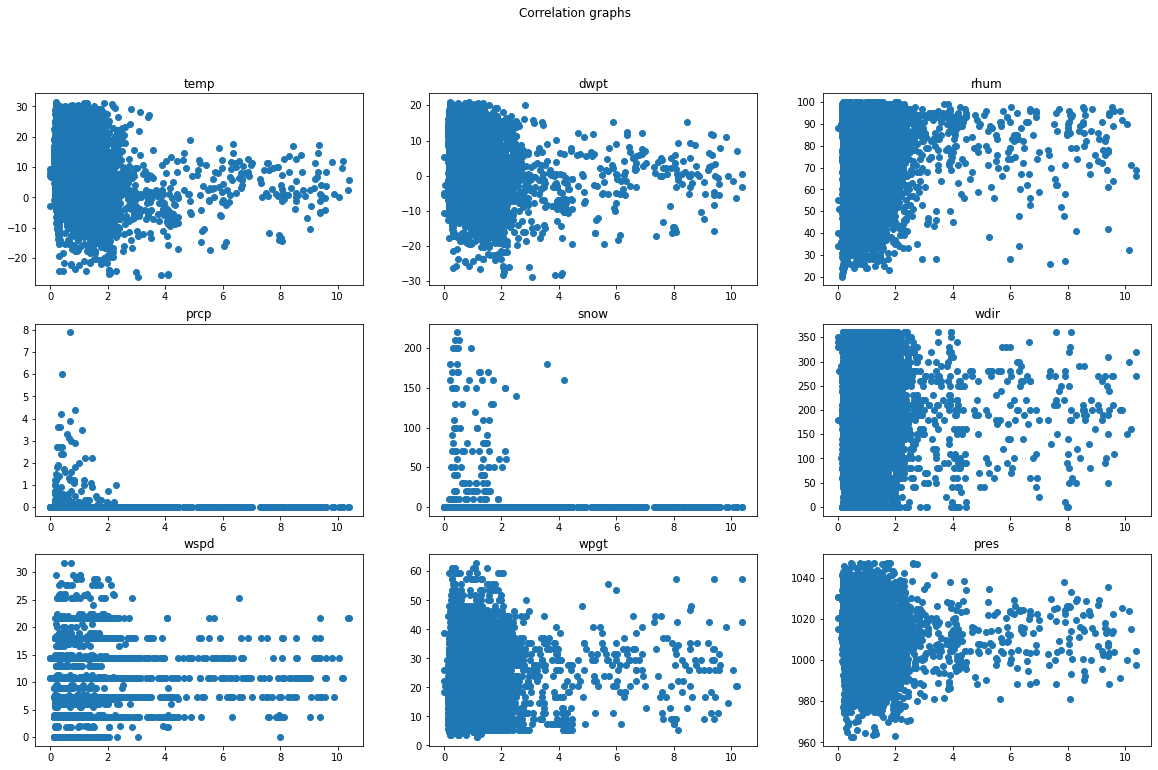

In [144]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle("Correlation graphs")


k = 0

for i in range(3):
  for j in range(3):
    #axes[i, j].scatter(train[variables[k]].fillna(0), train.consumption.fillna(0))
    axes[i, j].scatter(train.consumption.fillna(0), train[variables[k]].fillna(0))
    axes[i, j].set_title(variables[k])

    k += 1

Text(0.5, 1.0, 'el_price')

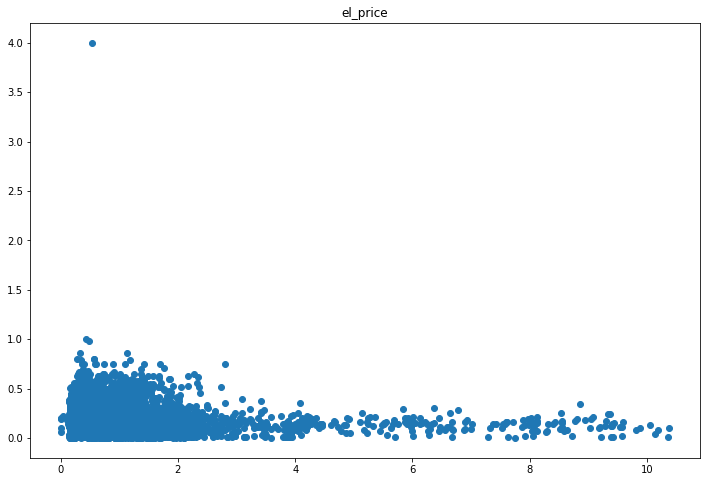

In [146]:
fig, axes = plt.subplots(figsize=(12, 8))

k = -1
axes.scatter(train.consumption.fillna(0), train[variables[k]].fillna(0))
axes.set_title(variables[k])


##Data preprocessing

In [311]:
from sklearn import preprocessing

def preprocess(dataFrame):
  if 'consumption' in dataFrame:
    dataFrame = dataFrame.dropna(subset=['consumption'])

  # Drop for now, coco (later one-hot-vector)
  # Snow and prcp because mostly 0 (NaN)
  dataFrame = dataFrame.drop(columns=['coco', 'snow', 'prcp'])

  # All remaning NaNs replaced with 0
  dataFrame = dataFrame.fillna(0)

  # Get weekday, month and hour of day
  dataFrame['time'] = pd.to_datetime(dataFrame.time, utc=True)
  dataFrame['time'] = dataFrame['time'].dt.tz_convert('Europe/Tallinn')
  dataFrame['day'] = dataFrame['time'].dt.weekday
  dataFrame['month'] = dataFrame['time'].dt.month
  dataFrame['hour'] = dataFrame['time'].dt.hour

  # Normalization
  colList = ['temp', 'dwpt','rhum', 'wdir', 'wspd', 'wpgt', 'pres', 'el_price',
             'day', 'month', 'hour']

  for col in colList:
    scaler = preprocessing.MinMaxScaler()
    normCol = scaler.fit_transform(dataFrame[[col]])
    dataFrame[col] = normCol

  # TODO: One-hot-vector encode days
  # TODO: One-hot-vector encode months
  # TODO: one-hot for hours?
  # Currently only normalize 0 - 1


  #TODO: get time in seconds and normalize it?
  #processedDataFrame = dataFrame.drop(columns=['time'])

  # If one-hot vector is done...
  #processedDataFrame = dataFrame.drop(columns=['day', 'month'])

  return dataFrame

In [312]:
processed_train = preprocess(train)

processed_train

,time,temp,dwpt,rhum,wdir,wspd,wpgt,pres,el_price,consumption,day,month,hour
0,2021-09-01 00:00:00+03:00,0.648696,0.786290,0.9250,0.888889,0.227129,0.229617,0.588928,0.022523,0.577,0.333333,0.727273,0.000000
1,2021-09-01 01:00:00+03:00,0.640000,0.772177,0.9125,0.888889,0.227129,0.168053,0.588928,0.023110,0.594,0.333333,0.727273,0.043478
2,2021-09-01 02:00:00+03:00,0.626087,0.760081,0.9250,0.888889,0.227129,0.168053,0.584217,0.022208,0.685,0.333333,0.727273,0.086957
3,2021-09-01 03:00:00+03:00,0.627826,0.747984,0.8750,0.916667,0.227129,0.168053,0.580683,0.021820,1.016,0.333333,0.727273,0.130435
4,2021-09-01 04:00:00+03:00,0.610435,0.741935,0.9250,0.833333,0.113565,0.168053,0.574794,0.021703,0.677,0.333333,0.727273,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,2022-08-24 19:00:00+03:00,0.925217,0.921371,0.4250,0.500000,0.126183,0.136439,0.676090,0.133720,0.678,0.333333,0.636364,0.826087
8588,2022-08-24 20:00:00+03:00,0.890435,0.923387,0.5125,0.611111,0.189274,0.136439,0.687868,0.124960,0.457,0.333333,0.636364,0.869565
8589,2022-08-24 21:00:00+03:00,0.886957,0.943548,0.5750,0.416667,0.126183,0.106489,0.686690,0.107857,0.500,0.333333,0.636364,0.913043
8590,2022-08-24 22:00:00+03:00,0.838261,0.921371,0.6625,0.444444,0.189274,0.106489,0.687868,0.137992,2.321,0.333333,0.636364,0.956522


##Simple models

In [289]:
processed_train.columns

Index(['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'wpgt', 'pres', 'el_price',
       'consumption', 'day', 'month', 'hour'],
      dtype='object')

In [336]:
from sklearn.model_selection import train_test_split


X = processed_train[['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'wpgt', 'pres', 
                    'el_price', 'day', 'month', 'hour']]
y = processed_train['consumption']

# To shuffle or not?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=111, shuffle=True)

In [359]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# LinearRegression
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_error = mean_squared_error(y_test, lr_predictions, squared = True)
print("LinearRegression: {}".format(lr_error))

# Ridge
reg = linear_model.Ridge()
reg.fit(X_train, y_train)
reg_prediction = reg.predict(X_test)
reg_error = mean_squared_error(y_test, reg_prediction, squared = True)
print("Ridge: {}".format(reg_error))

# Lasso
las = reg = linear_model.Lasso()
las.fit(X_train, y_train)
las_predictions = las.predict(X_test)
las_error = mean_squared_error(y_test, las_predictions, squared = True)
print("Lasso: {}".format(las_error))

# BayesianRidge
bay = linear_model.BayesianRidge()
bay.fit(X_train, y_train)
bay_predictions = bay.predict(X_test)
bay_error = mean_squared_error(y_test, bay_predictions, squared = True)
print("BayesianRidge: {}".format(bay_error))

# KNeighboursRegressor()
knn  = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_error = mean_squared_error(y_test, knn_predictions, squared = True)
print("KNeighboursRegressor: {}".format(knn_error))

# DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 100)
dtr.fit(X_train, y_train)
dtr_predictions = dtr.predict(X_test)
dtr_error = mean_squared_error(y_test, dtr_predictions, squared = True)
print("DecisionTreeRegressor: {}".format(dtr_error))

LinearRegression: 1.094854331946907
Ridge: 1.0938765918005007
Lasso: 1.2275677513681067
BayesianRidge: 1.0938584428899323
KNeighboursRegressor: 0.9224289444703144
DecisionTreeRegressor: 1.7250947305005824


##Submitting predictions to kaggle

In [323]:
test =  pd.read_csv('test.csv')
processed_test = preprocess(test)
processed_test

,time,temp,dwpt,rhum,wdir,wspd,wpgt,pres,el_price,day,month,hour
0,2022-08-25 00:00:00+03:00,0.593607,0.723404,0.575342,0.944444,0.346154,0.136691,0.909091,0.313208,0.500000,0.0,0.000000
1,2022-08-25 01:00:00+03:00,0.547945,0.716312,0.630137,0.083333,0.230769,0.334532,0.909091,0.237031,0.500000,0.0,0.043478
2,2022-08-25 02:00:00+03:00,0.547945,0.716312,0.630137,0.888889,0.269231,0.269784,0.909091,0.228973,0.500000,0.0,0.086957
3,2022-08-25 03:00:00+03:00,0.484018,0.851064,0.863014,0.000000,0.153846,0.201439,0.939394,0.242768,0.500000,0.0,0.130435
4,2022-08-25 04:00:00+03:00,0.456621,0.858156,0.917808,0.777778,0.269231,0.201439,0.909091,0.258468,0.500000,0.0,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022-08-31 19:00:00+03:00,0.136986,0.070922,0.602740,0.888889,0.730769,0.866906,0.454545,0.423407,0.333333,0.0,0.826087
164,2022-08-31 20:00:00+03:00,0.136986,0.014184,0.547945,0.861111,0.576923,0.669065,0.454545,0.412814,0.333333,0.0,0.869565
165,2022-08-31 21:00:00+03:00,0.091324,0.092199,0.684932,0.805556,0.423077,0.600719,0.522727,0.334645,0.333333,0.0,0.913043
166,2022-08-31 22:00:00+03:00,0.045662,0.007092,0.671233,0.861111,0.576923,0.467626,0.454545,0.350433,0.333333,0.0,0.956522


In [352]:
# Model where consumption is avarage over training set
base_line = train.consumption.mean()
submission = pd.DataFrame(
    {'time': processed_test.time, 'consumption': base_line},
    columns = ['time', 'consumption'])
submission.to_csv('submission_baseline.csv', index = False)

In [353]:
# Submit submission
!kaggle competitions submit -c predict-electricity-consumption -f submission_baseline.csv -m "Consumption avarage"

100% 7.40k/7.40k [00:00<00:00, 17.2kB/s]
400 - Bad Request


In [348]:
# Best model, train on entire training set and predict values
knn  = KNeighborsRegressor()
knn.fit(X, y)
knn_predictions = knn.predict(processed_test[['temp', 'dwpt', 'rhum', 'wdir', 
                                               'wspd', 'wpgt', 'pres', 
                                               'el_price', 'day', 'month', 'hour']])

In [349]:
submission = pd.DataFrame(
    {'time': processed_test.time, 'consumption': knn_predictions},
    columns = ['time', 'consumption'])
submission.to_csv('knn_reg_submission.csv', index = False)

In [358]:
!kaggle competitions submit -c predict-electricity-consumption -f knn_reg_submission.csv -m "KNeighborsRegressor default correct"

100% 6.01k/6.01k [00:00<00:00, 16.7kB/s]
400 - Bad Request


##TODO:


1) One hot vector encoding weekday, month and maybe hour.

2) Weather condition code -> one hot vector, avarage out the less frequent

3) Snow and prcp NaN problem.

4) Look into better time-series methods.

5) Cross validation + model parameter optimization

6) PCA?

7) Ensemble methods

8) Neural networks

9) Adding previous consumption values into models. (Last 6 hours of consumption is also a input variable)



**Make slides and prepare for intermediate presentations.**